In [1]:
# project: p13
# submitter: zchen697
# partner: crzhong

In [2]:
import requests,json
import pandas as pd
from pandas import DataFrame, Series
import os
import numpy as np
from copy import deepcopy
import copy

In [3]:
#This function is from p12
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    else:
        temp_data = requests.get(url)
        temp_text = temp_data.text
        f = open(filename,"w")
        f.write(temp_text)
        f.close()
      
    # TODO: Write the code to download the file from URL
    # and save it in `filename`

    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p13/countries.json")
countries = pd.read_json("countries.json")

In [5]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [6]:
def qry(QUERRY):
    return pd.read_sql(QUERRY, conn)

pd.read_sql("SELECT * from sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,countries,countries,2,"CREATE TABLE ""countries"" (\n""area"" INTEGER,\n ..."


In [7]:
#q1

region_ordered = qry("""SELECT region, count(region) AS `number of countries`
FROM countries
GROUP BY region
ORDER BY `number of countries` DESC, region ASC
""")

region_ordered

,region,number of countries
0,SUB-SAHARAN AFRICA,42
1,LATIN AMER. & CARIB,33
2,WESTERN EUROPE,22
3,ASIA (EX. NEAR EAST),21
4,NEAR EAST,13
5,C.W. OF IND. STATES,12
6,OCEANIA,12
7,EASTERN EUROPE,8
8,NORTHERN AFRICA,5
9,BALTICS,3


<AxesSubplot:xlabel='region', ylabel='number of countries'>

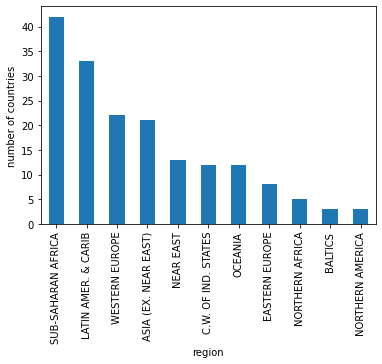

In [8]:
#q2 

plot_countries = region_ordered.plot.bar(x = "region", legend = False)
plot_countries.set_ylabel("number of countries")
plot_countries.set_xlabel("region")

plot_countries

In [9]:
#q3

area_calculated = qry("""SELECT region, SUM(area) AS `total area`
FROM countries
GROUP BY region
ORDER BY `total area` DESC, region ASC
""")

area_calculated

,region,total area
0,ASIA (EX. NEAR EAST),22177295
1,C.W. OF IND. STATES,22100843
2,LATIN AMER. & CARIB,20426877
3,NORTHERN AMERICA,19616143
4,SUB-SAHARAN AFRICA,19446660
5,OCEANIA,8488612
6,NORTHERN AFRICA,5752890
7,NEAR EAST,4340116
8,WESTERN EUROPE,3707838
9,EASTERN EUROPE,938554


<AxesSubplot:xlabel='region', ylabel='total area'>

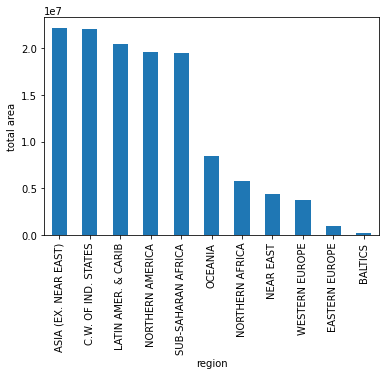

In [10]:
#q4

area_countries = area_calculated.plot.bar(x = "region", legend = False)
area_countries.set_ylabel("total area")
area_countries.set_xlabel("region")

area_countries

In [11]:
#q5

near_east_area = qry("""SELECT country, SUM(area) AS `area`
FROM countries WHERE region = "NEAR EAST"
GROUP BY area
ORDER BY `area` DESC, region ASC
""")

near_east_area

,country,area
0,Saudi Arabia,1960582
1,Turkey,780580
2,Yemen,527970
3,Iraq,437072
4,Oman,212460
5,Syria,185180
6,Jordan,92300
7,United Arab Emirates,82880
8,Israel,20770
9,Kuwait,17820


In [12]:
#q6

high_gdp = qry("""SELECT country, ("population" * "gdp-per-capita")/1000000000.0  AS `Real GDP(billion)`
FROM countries 
GROUP BY country
ORDER BY `Real GDP(billion)` DESC
""")

high_gdp[:12]

,country,Real GDP(billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


<ipython-input-13-a434df586d19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_gdp.loc[12, "Real GDP(billion)"] = high_gdp["Real GDP(billion)"].iloc[12:].sum()
<ipython-input-13-a434df586d19>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_gdp["country"][12] = "other"


Text(0.5, 0, 'country')

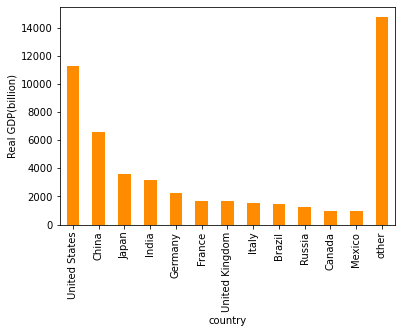

In [13]:
#q7

plot_gdp = high_gdp.iloc[:12]

plot_gdp.loc[12, "Real GDP(billion)"] = high_gdp["Real GDP(billion)"].iloc[12:].sum()
plot_gdp["country"][12] = "other"
gdp_final_plot = plot_gdp.plot.bar(x = "country", color = "darkorange", legend = False)
gdp_final_plot.set_ylabel("Real GDP(billion)")
gdp_final_plot.set_xlabel("country")



In [14]:
def covert_to_float(x):
    y = x.replace(",",".")
    return float(y)

<AxesSubplot:xlabel='gdp-per-capita', ylabel='literacy'>

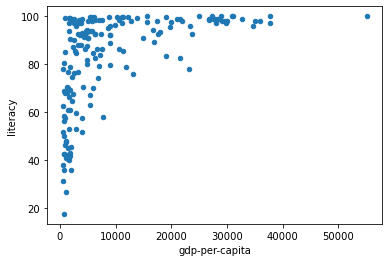

In [15]:
#q8

countries["literacy"] = countries["literacy"].apply(covert_to_float)
countries.plot.scatter(x = "gdp-per-capita", y = "literacy", legend = False)


In [16]:
#q9

countries.corr()["literacy"]["gdp-per-capita"]

0.5154347345101354

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

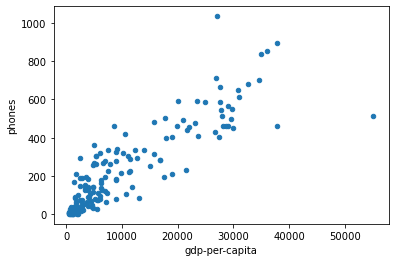

In [17]:
#q10

countries["phones"] = countries["phones"].apply(covert_to_float)
countries.plot.scatter(x = "gdp-per-capita", y = "phones", legend = False)

<AxesSubplot:xlabel='gdp-per-capita', ylabel='infant-mortality'>

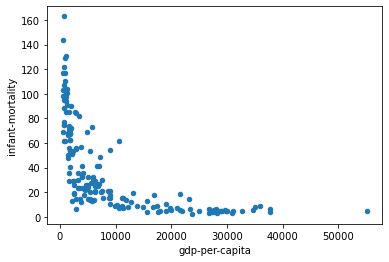

In [18]:
#q11

countries.plot.scatter(x = "gdp-per-capita", y = "infant-mortality", legend = False)

In [19]:
def inverse_data(a):
    return 1/a

<AxesSubplot:xlabel='gdp-per-capita', ylabel='inverse_infant_mortality'>

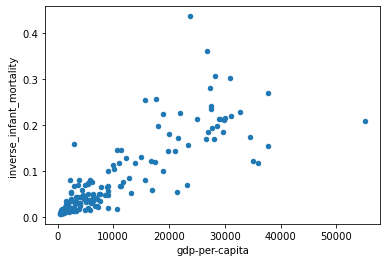

In [20]:
#q12

countries["inverse_infant_mortality"] = countries["infant-mortality"].apply(inverse_data)
countries.plot.scatter(x = "gdp-per-capita", y = "inverse_infant_mortality", legend = False)

In [21]:
#q13

df = copy.deepcopy(countries)
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["phones"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
tuplecheck_result = (m,n)

tuplecheck_result

(0.018088878836039785, 37.95908987837679)

In [22]:
#q14

calculated_phone_number = m * 30000 + n

calculated_phone_number

580.6254549595703

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

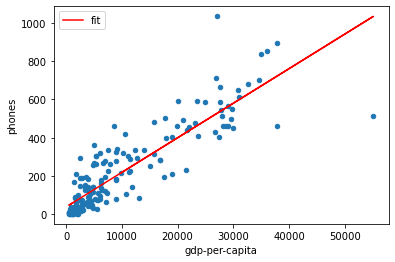

In [23]:
#q15

ax = df.plot.scatter(x='gdp-per-capita', y='phones')

df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [24]:
#q16

smallest_diff = qry("""SELECT "country","birth-rate","death-rate"
FROM countries 
GROUP BY country
ORDER BY ("birth-rate" - "death-rate") ASC
LIMIT 15
""")

smallest_diff

,country,birth-rate,death-rate
0,Botswana,23.08,29.50
1,Ukraine,8.82,14.39
2,Russia,9.95,14.65
3,Bulgaria,9.65,14.27
4,Latvia,9.24,13.66
5,Lesotho,24.75,28.71
6,South Africa,18.20,22.00
7,Monaco,9.19,12.91
8,Hungary,9.72,13.11
9,Estonia,10.04,13.25


Text(0.5, 0, '')

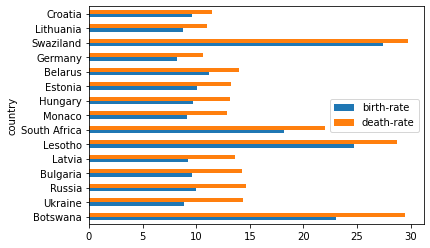

In [25]:
#q17

diff_plot = smallest_diff.plot.barh(x = "country", legend = True)
diff_plot.set_ylabel("country")
diff_plot.set_xlabel("")


<AxesSubplot:xlabel='population', ylabel='gdp-per-capita'>

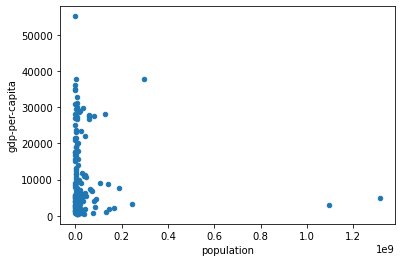

In [26]:
#q18

countries.plot.scatter(x = "population", y = "gdp-per-capita", legend = False)

In [27]:
#q19

qry("""SELECT "country","population","gdp-per-capita"
FROM countries
GROUP BY country HAVING ("population" > 298000000 OR "gdp-per-capita" > 40000)
ORDER BY "gdp-per-capita" ASC
""")

,country,population,gdp-per-capita
0,India,1095351995,2900
1,China,1313973713,5000
2,United States,298444215,37800
3,Luxembourg,474413,55100


Text(0.5, 0, '')

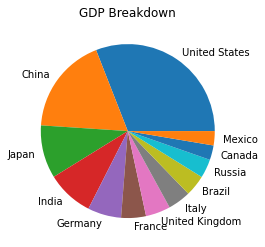

In [28]:
#q20

pie_gdp = high_gdp[:12].plot.pie(x = "country", y = "Real GDP(billion)", labels = high_gdp["country"][:12], title = "GDP Breakdown", legend = False)
pie_gdp.set_ylabel("")
pie_gdp.set_xlabel("")

In [29]:
conn.close() 